# Clustering

importing packages required for handling data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

print( 'import done')

import done


In [2]:
try:
    data2cluster = pd.read_csv( 'assignment_shala_clustering.csv')
except:
    data2cluster = pd.read_csv( 'https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv')
    print( 'files taken from net')


print( 'files loaded')

files loaded


In [3]:
data2cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data2cluster.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data2cluster.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
for i in data2cluster.columns:
    print( 'For {} :'.format( i))
    print( data2cluster[i].value_counts())
    print()


For CustomerID :
200    1
63     1
73     1
72     1
71     1
      ..
131    1
130    1
129    1
128    1
1      1
Name: CustomerID, Length: 200, dtype: int64

For Gender :
Female    112
Male       88
Name: Gender, dtype: int64

For Age :
32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

For Annual Income (k$) :
54     12
78     12
60      6
87      6
62      6
       ..
61      2
126     2
59      2
58      2
15      2
Name: Annual Income (k$), Length: 64, dtype: int64

For Spending Score (1-100) :
42    8
55    7
46    6
73    6
35    5
     ..
31    1
82  

As there is 1 object column in dataframe, converting it to a numeric one.

Also, the customer ID column is not going to help in the clustering. So dropping the column.

In [7]:
# convering gender to numeric
gender_label = { 'Male': 0, 'Female': 1}
data2cluster.Gender = [ gender_label[ i] for i in data2cluster.Gender]

data2cluster.drop( columns= 'CustomerID', inplace= True)

data2cluster.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [8]:
data2cluster.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


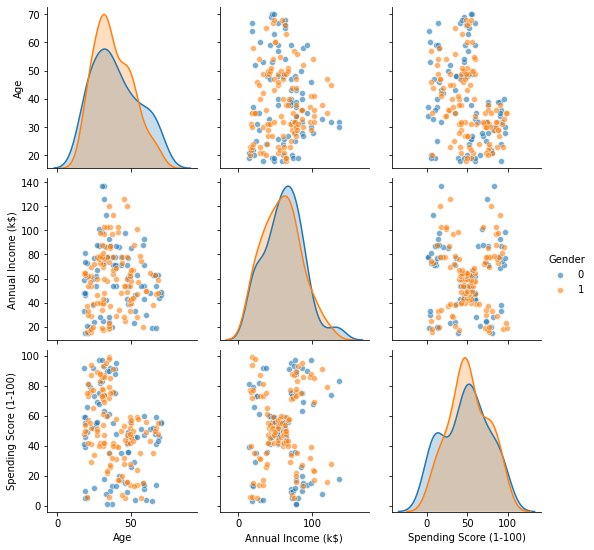

In [10]:
sns.pairplot( data2cluster, hue= 'Gender', plot_kws= { 'alpha': 0.6})

## Implementing K Means Clustering



In [11]:
# making a function that returns the centers of all the clusters
def init_clusters( num_clusters, num_features, 
                   feature_range = 0, feature_mins = 1):
    """
    INPUT:
    2 numbers, number of clusters and features.
    The feature_range as an array which contains the range of the corresponding feature
    The feature_mins as an array which contains the minimum value of the corresponding feature
    All inputs must be given.
    OUTPUT:
    Initialises and returns the centers of all the clusters as an array.
    """
    try: 
        feature_range = feature_range.reshape( 1, -1)  
        feature_mins = feature_mins.reshape( 1, -1)
    except:
        feature_range = np.ones( ( 1, num_features))
        feature_mins = np.zeros( ( 1, num_features))

    if feature_range.shape != feature_mins.shape:
        raise IndexError

    clusters = np.random.rand( num_clusters, num_features)
    # print( clusters, feature_range)
    clusters = clusters * feature_range
    clusters = clusters + feature_mins

    return clusters
    

def distance_func( point1, point2, power = 2):
    """
    INPUT:
    2 arrays, and a number.
    OUTPUT:
    returns the minkowski distance between the two points given.
    if no power is entered then euclidean distance is calculated
    CONDITION:
    both points must be of same shape.
    """
    if point1.shape != point2.shape:
        print( 'Submitted points are: ')
        print( '   ', point1)
        print( '   ', point2)
        print( point2.shape)
        raise IndexError
        
    point1 = point1.reshape( -1, 1)
    point2 = point2.reshape( -1, 1)

    mod_difference = abs( point1 - point2)
    mod_difference = np.power( mod_difference, power)

    mink_distance = sum( mod_difference)
    mink_distance = np.power( mink_distance, 1/power)
    
    return mink_distance

# checking functions
clusters_trial = init_clusters( num_clusters= 2, num_features= 2)
print( clusters_trial)

distance_trial = distance_func( clusters_trial[0], clusters_trial[1])
print( distance_trial)

[[0.48787029 0.70488343]
 [0.2797308  0.0037292 ]]
[0.73139545]


Now, defining functions for assigning the nearest cluster to each one of the points.

In [12]:
def cluster_assigner_one( centers, data_pt):
    """
    INPUT:
    2 arrays, centers = containing all the centers of clusters,
    and the data_pt = data point.
    OUTPUT:
    returns the value in which the cluster is there.
    """
    distances_cluster = pd.Series( np.zeros( centers.shape[0]))

    for i in range( centers.shape[0]):
        distances_cluster.iloc[i] = distance_func( centers[i], data_pt)
    
    distances_cluster = distances_cluster.sort_values( ascending= True)
    return distances_cluster.index[0]




def cluster_assigner_whole( centers, data_pts):
    """
    INPUT:
    2 arrays, centers = containing all the centers of clusters,
    and the data_pts = datato be sorted into clusters.
    OUTPUT:
    returns a Series in which the cluster information is there.
    """
    #defining clusters column
    cluster_no = pd.Series( np.zeros( len( data_pts)), name= 'Cluster Number')

    # differentiating into clusters
    for i in range( len( data_pts)):
        num_cluster = cluster_assigner_one( centers= centers, data_pt= np.array( data_pts.iloc[i]))
        cluster_no.iloc[i] = num_cluster
    
    return cluster_no


print( 'function written')

function written


Creating loss calculators...

In [13]:
# defining the loss function 
def k_mean_loss_one_cluster( center, data_pts):
    loss = 0

    for i in data_pts:
        distance = distance_func( center, i)
        loss += distance * distance
    
    return loss

def k_mean_loss_calculator( centers, data_pts, cluster_info):
    
    loss = 0
    for i in range( centers.shape[0]):
        loss += k_mean_loss_one_cluster( centers[i], 
                                 np.array( data_pts[ cluster_info == i]))
    
    return loss

print( 'function loaded')

function loaded


For updating the cluster center...

In [14]:
def center_update_one( data_pts):  
    """
    Updates the center according to the center of the current cluster.
    INPUT:
    An array containing all the data points.
    OUTPUT: 
    Center of the cluster
    """  
    return data_pts.mean()

def center_update_all( data_pts, cluster_info, centers):
    """
    INPUT:
    First, DataFrame, contains all the datapoints.
    Second, a Series, contains the number of the cluster in which the point is.
    Third, integer, contains the number of clusters.
    OUTPUT:
    an array, containing all the cluster centers.
    """

    for i in range( centers.shape[0]):
        centers[i] = center_update_one( data_pts[ cluster_info == i])

    return centers

print( 'functions loaded')


functions loaded


Finally, making the whole K Means Clusterer.

In [15]:
temp = data2cluster
temp = pd.concat( [data2cluster, pd.Series( np.zeros( len( data2cluster)), name= 'Cluster Number')], axis= 1)

print( data2cluster.head())
print( temp[ temp.columns[ : -1]])

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137   

In [16]:
def K_Means_clusterer( data, k_value= 5, repeats= 300):

    #defining clusters
    clusters_data = init_clusters( num_clusters= k_value, num_features= data.shape[1], 
                                feature_range= np.array( data.max()) - np.array( data.min()), 
                                feature_mins= np.array( data.min()))

    temp_data = pd.concat( [data, pd.Series( np.zeros( len( data)), name= 'Cluster Number')], axis= 1)
    data = np.array( data)

    temp_data['Cluster Number'] = cluster_assigner_whole( clusters_data, temp_data[ temp_data.columns[:-1]])
    loss_list = [ float( k_mean_loss_calculator( clusters_data, data, temp_data[ 'Cluster Number']))]

    #clustering into clusters and doing all the work 
    for _ in range( repeats - 1):  
        #updating the cluster center
        clusters_data = center_update_all( temp_data[ temp_data.columns[:-1]], temp_data['Cluster Number'], clusters_data)

        # labeling into clusters
        temp_data['Cluster Number'] = cluster_assigner_whole( clusters_data, temp_data[ temp_data.columns[:-1]])

        # calculating the loss
        loss_list.append( float( k_mean_loss_calculator( clusters_data, temp_data[ temp_data.columns[:-1]], temp_data['Cluster Number'])))

      
    return temp_data['Cluster Number'], loss_list, clusters_data

In [104]:
loss_list = [] 
silhoutte_score_list = []
from sklearn.metrics import silhouette_score

for i in range( 19):
    cluster_values, losses, clusters_centers = K_Means_clusterer( data2cluster, k_value= i+2, repeats= 15)
    if i == 4:
        chosen_loss = losses
        chosen_centers = clusters_centers
        cluster_values_chosen = cluster_values
    loss_list.append( losses[-1])
    print( i, losses[-1])
    silhoutte_score_list.append( silhouette_score( data2cluster, cluster_values))
    # print( 'decided centers are:')
    # print( '   ', clusters_centers)
    # print( 'Number of points in each cluster')
    # cluster_values.value_counts()

0 219942.05850794617
1 154809.8646747401
2 122787.06544695616
3 79346.99372582372
4 58350.65449462818
5 65912.0758568882
6 69391.53845571981
7 42757.75960507329
8 45314.640934740935
9 36544.21872594998
10 41815.659952945614
11 36812.9771095133
12 35105.10175274248
13 38787.078011204474
14 35215.94876651127
15 26822.289591402754
16 25665.859275989707
17 29240.41411406629
18 26267.428932178937


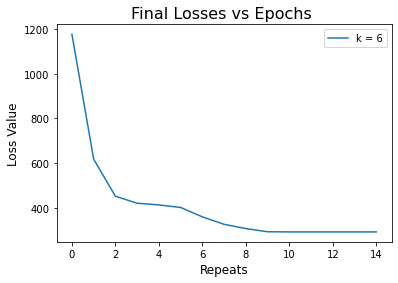

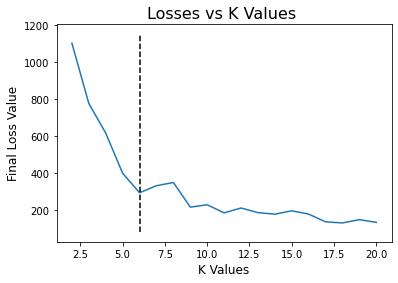

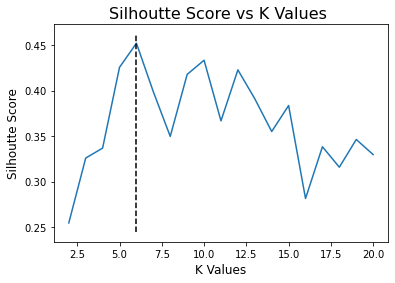

In [106]:
# plotting loss with respect to repeats
plt.plot( np.arange( len( chosen_loss)), np.array( chosen_loss)/len( data2cluster), label= 'k = 6')
plt.title( 'Final Losses vs Epochs ', fontsize= 16)
plt.xlabel( 'Repeats', fontsize= 12)
plt.ylabel( 'Loss Value', fontsize= 12)
plt.legend()
plt.show()

plt.plot( np.arange( 2, 2+len( loss_list)), np.array( loss_list)/len( data2cluster))
plt.title( 'Losses vs K Values ', fontsize= 16)
plt.xlabel( 'K Values', fontsize= 12)
plt.ylabel( 'Final Loss Value', fontsize= 12)
plt.plot( [6, 6], plt.ylim(), 'k--')
plt.show()

plt.plot( np.arange( 2, 2+len( loss_list)), silhoutte_score_list)
plt.title( 'Silhoutte Score vs K Values ', fontsize= 16)
plt.xlabel( 'K Values', fontsize= 12)
plt.ylabel( 'Silhoutte Score', fontsize= 12)
plt.plot( [6, 6], plt.ylim(), 'k--')
plt.show()

# after seeing plot for 300, reducing the repeats to 30

What we can conclude from this K values versus Losses curve is that as the number of center points increase, the loss will only go down.

See it as this. lets choose 200 centers. then every point will form its own cluster. which is something you don't want to do but it minimises the loss to 0, which is the least you can do.

So, choosing the number of clusters on value of the loss is not recommended.

Also, we need to be computationally efficient, and a good number of clusters. Hence, we need to decide a value after which it doesn't decrease that much.

Hence, I choose the value = 6

In [141]:
clustered_data = pd.concat( [ data2cluster, cluster_values_chosen], axis= 1)

clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    int64  
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    int64  
 4   Cluster Number          200 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


In [142]:
print( clustered_data['Cluster Number'].value_counts())

2.0    44
5.0    39
4.0    38
1.0    35
3.0    22
0.0    22
Name: Cluster Number, dtype: int64


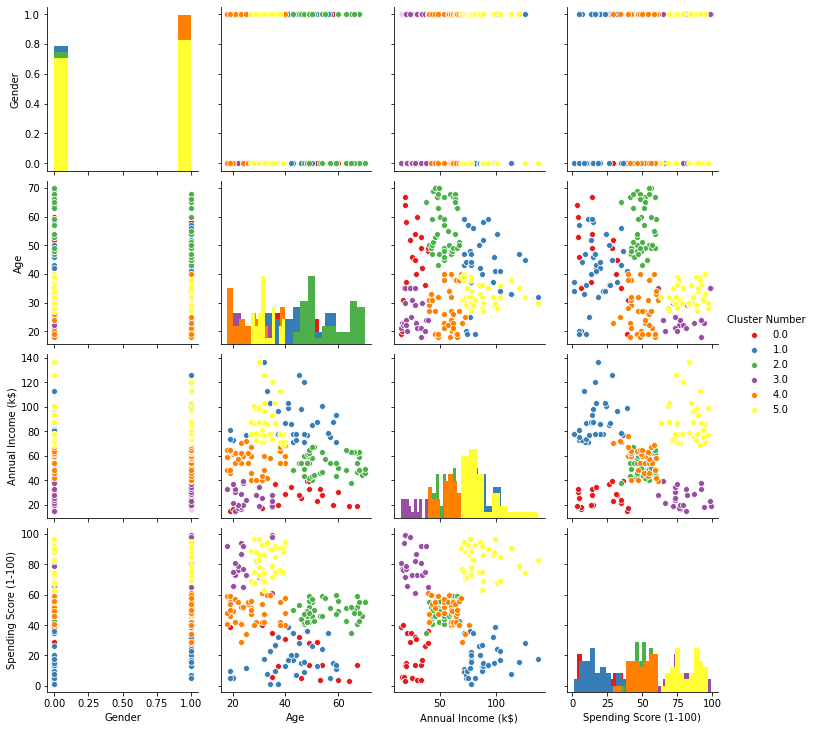

In [143]:
sns.pairplot( clustered_data, hue= 'Cluster Number', diag_kind= 'hist', palette= 'Set1')

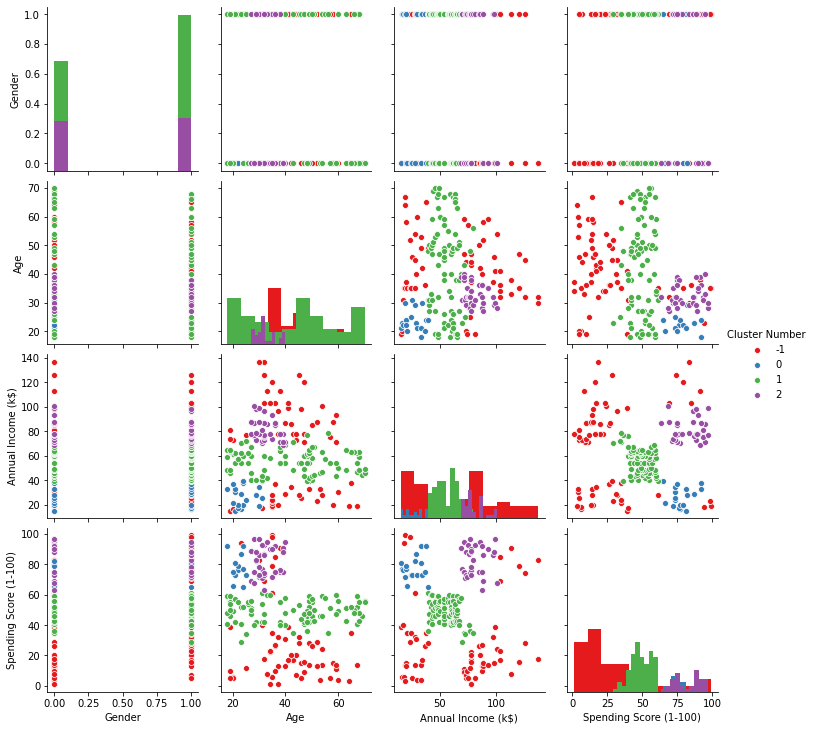

In [148]:
sns.pairplot( clustered_data, hue= 'Cluster Number', diag_kind= 'hist', palette= 'Set1')

We have also done many models via other methods like DBSCAN, hierarchial clustering, etc, but in that sklearn is used, so not displayed here. 

Also, we don't think we will use clustering but still did it. So if we found a use we can implement it easily. 